<a href="https://colab.research.google.com/github/IdealisticINTJ/My_Machine_Learning_Projects/blob/main/Ingredients_of_Indian_Sukh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('RdYlGn_r')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
happiness = pd.read_csv('world-happiness-report-2021.csv')


In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
happiness_report = happiness.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia'], axis = 1)

In [ ]:
happiness_report.describe()


,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


In [ ]:
happiness_report.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798


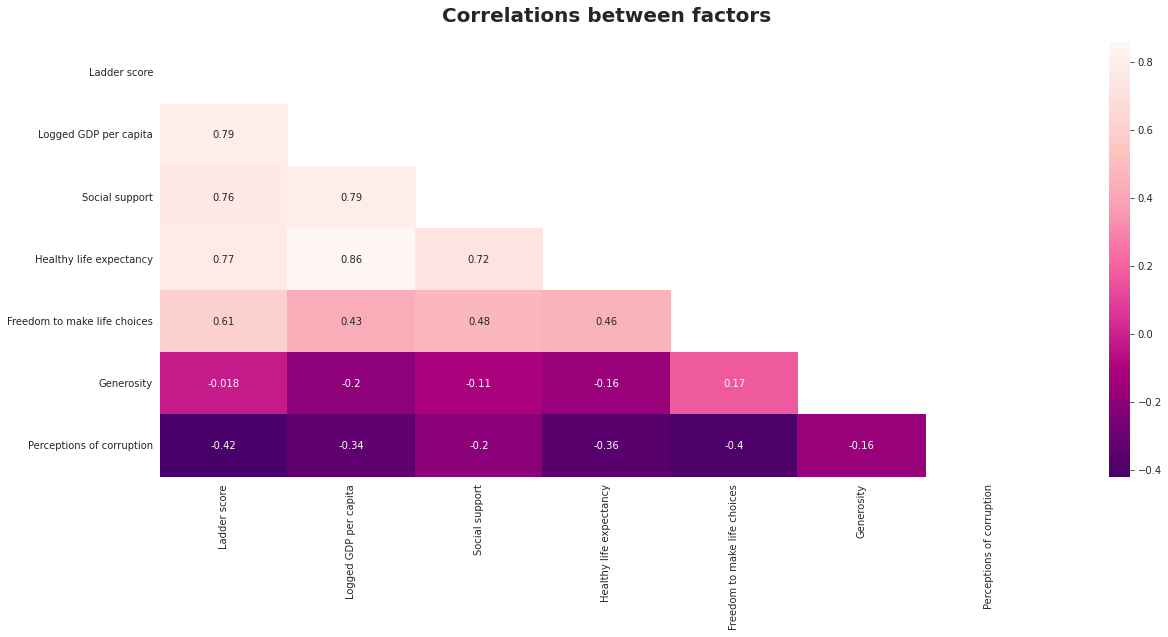

In [ ]:
cols = happiness_report[['Ladder score', 'Logged GDP per capita','Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
plt.figure(figsize=(20, 8))
sns.heatmap(cols.corr(), annot = True, cmap='RdPu_r', mask=np.triu(np.ones_like(cols.corr())));
plt.title('Correlations between factors', fontsize=20, fontweight='bold', pad=20);

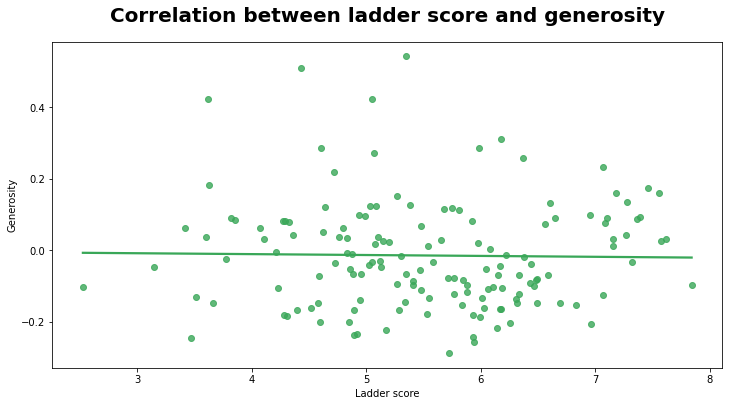

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Generosity', data=happiness_report, ci=None);
plt.title('Correlation between ladder score and generosity', fontsize=20, fontweight='bold', pad=20);

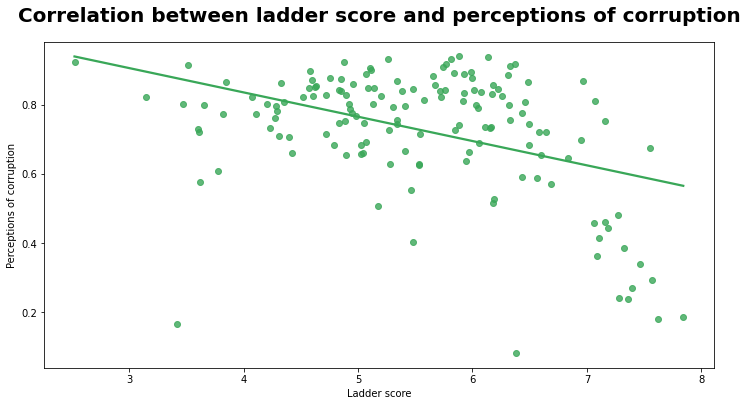

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Ladder score', y='Perceptions of corruption', data=happiness_report, ci=None);
plt.title('Correlation between ladder score and perceptions of corruption', fontsize=20, fontweight='bold', pad=20);

In [ ]:
happiness_report_older = pd.read_csv('world-happiness-report.csv')
india_1 = happiness_report_older[happiness_report_older['Country name'] == 'India'].reset_index(drop=True) 
india_1 = india_1.drop(['Positive affect','Negative affect'], axis = 1)
india_1 = india_1.fillna(0)
happiness_report['year'] = 2021
india_2 = happiness_report[happiness_report['Country name'] == 'India']
india_2 = india_2.rename(columns = {'Ladder score':'Life Ladder',
                'Logged GDP per capita':'Log GDP per capita',
                'Healthy life expectancy':'Healthy life expectancy at birth'})
india_2 = india_2.drop(['Dystopia + residual', 'Regional indicator'], axis = 1)
india = pd.concat([india_1, india_2])
india.reset_index(drop=True, inplace=True)
india.rename(columns = {'year':'Year'}, inplace=True)
india

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,India,2006,5.348,8.145,0.707,55.720,0.774,0.000,0.855
1,India,2007,5.027,8.204,0.569,56.140,0.729,-0.051,0.862
2,India,2008,5.146,8.220,0.684,56.560,0.756,-0.072,0.891
3,India,2009,4.522,8.281,0.653,56.980,0.679,-0.026,0.895
4,India,2010,4.989,8.349,0.605,57.400,0.783,0.058,0.863
5,India,2011,4.635,8.387,0.553,57.700,0.838,-0.038,0.908
6,India,2012,4.720,8.428,0.511,58.000,0.609,0.067,0.830
7,India,2013,4.428,8.478,0.553,58.300,0.740,0.084,0.832
8,India,2014,4.424,8.538,0.621,58.600,0.809,-0.026,0.832
9,India,2015,4.342,8.604,0.610,58.900,0.777,-0.005,0.776


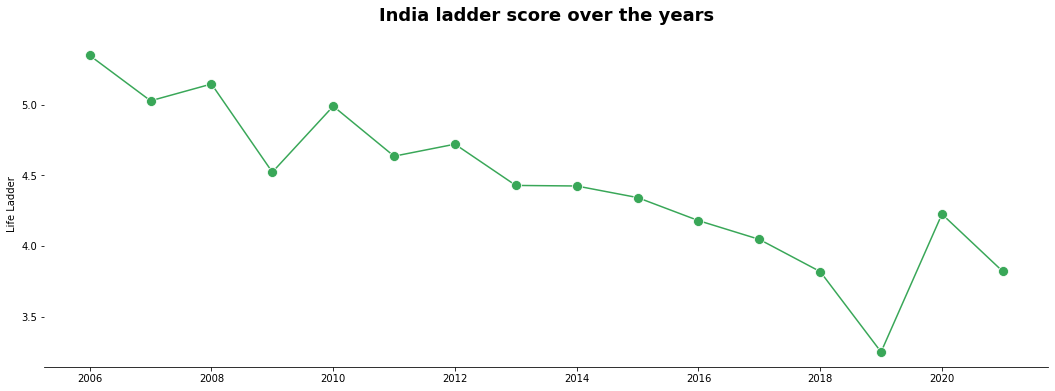

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Life Ladder', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India ladder score over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

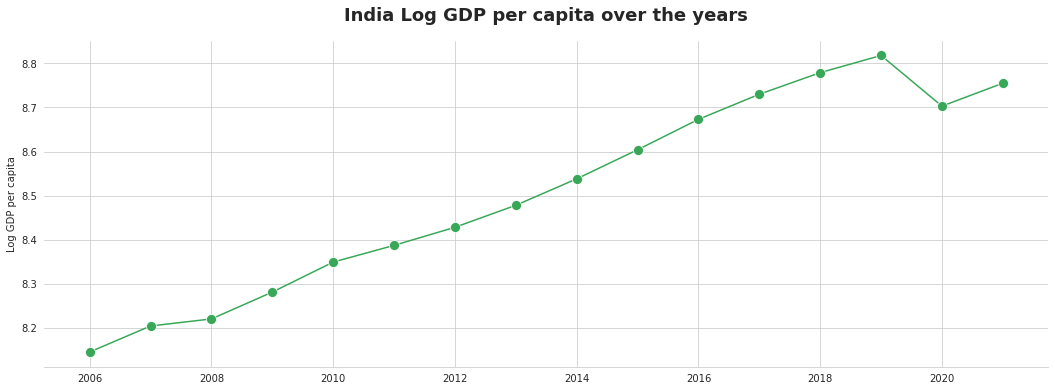

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Log GDP per capita', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India Log GDP per capita over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

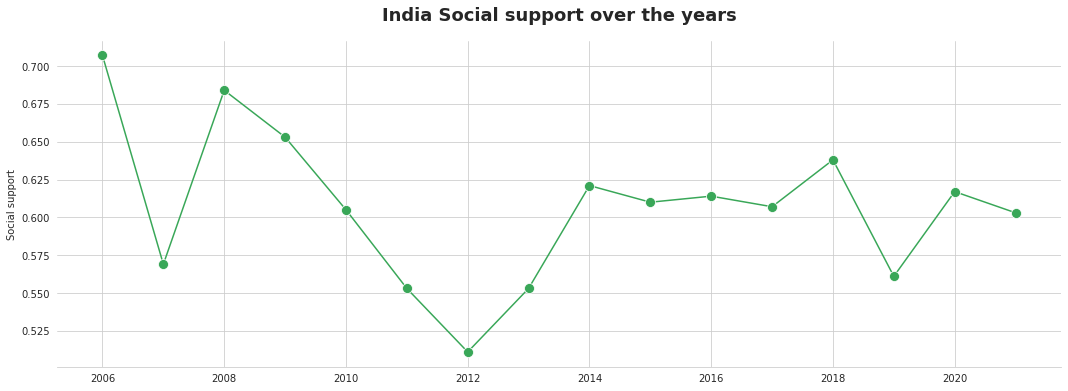

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Social support', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India Social support over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()


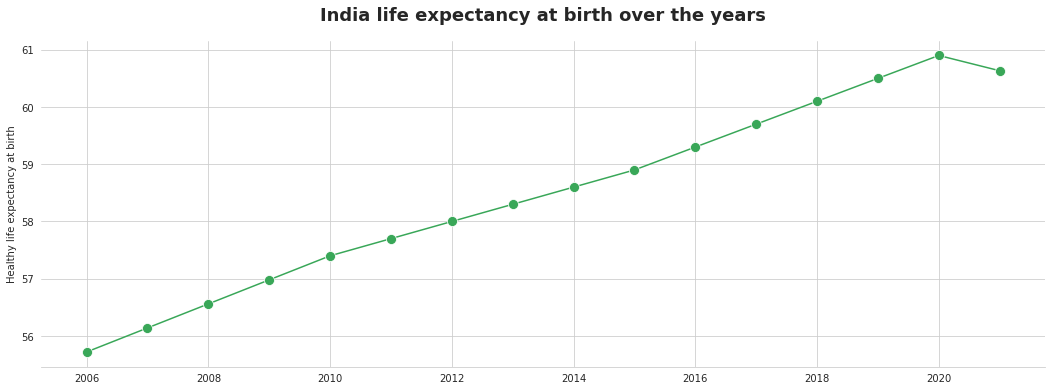

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Healthy life expectancy at birth', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('India life expectancy at birth over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

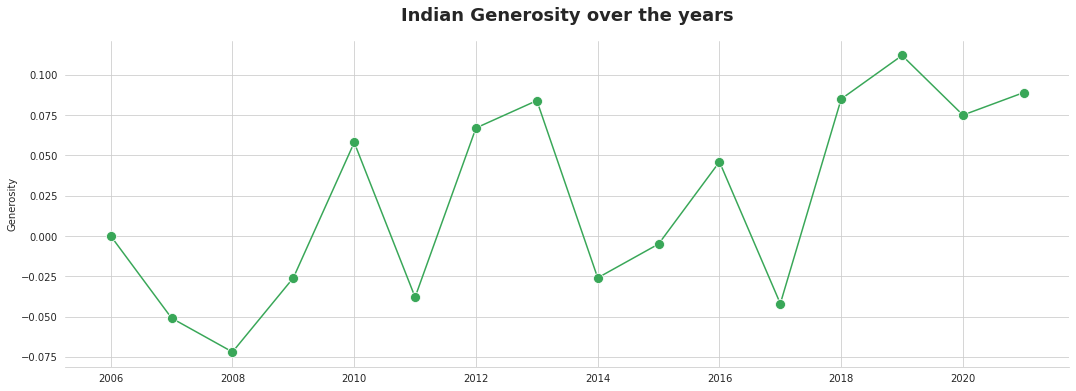

In [ ]:
plt.figure(figsize=(18, 6)) 
sns.lineplot(x='Year', y='Generosity', data=india, marker='o', markersize=10); sns.set_style('whitegrid') 
sns.despine(left=True) 
plt.title('Indian Generosity over the years', fontsize=18, fontweight='bold', pad=20) 
plt.xlabel('') 
plt.show()

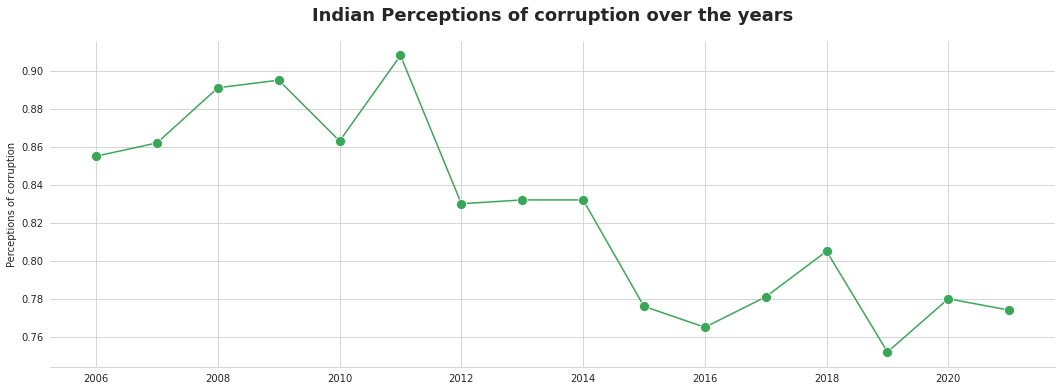

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='Year', y='Perceptions of corruption', data=india, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Indian Perceptions of corruption over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()


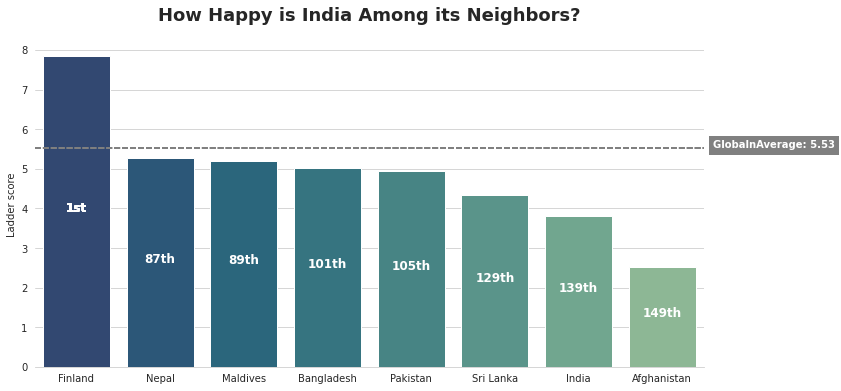

In [40]:
top = happiness_report[happiness_report['Country name'] == 'Finland']
south_asia = happiness_report[happiness_report['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, south_asia], axis=0)
top_bottom_neighbors['Rank'] = top_bottom_neighbors.index + 1
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop(['Regional indicator', 'Dystopia + residual', 'year'], axis=1, inplace=True)
df_glob = happiness_report.sort_values('Ladder score', ascending=False)[['Country name', 'Ladder score', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Ladder score'] == df_glob['Ladder score'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)
mean_score = happiness_report['Ladder score'].mean()
rank = list(top_bottom_neighbors['Rank'])
fig, ax = plt.subplots(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Ladder score', data=top_bottom_neighbors, palette='crest_r')
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
  bar.text(x=i, y=(top_bottom_neighbors['Ladder score'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.text(x=0, y=(top_bottom_neighbors['Ladder score'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.axhline(mean_score, color='grey', linestyle='--')
  bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('How Happy is India Among its Neighbors?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

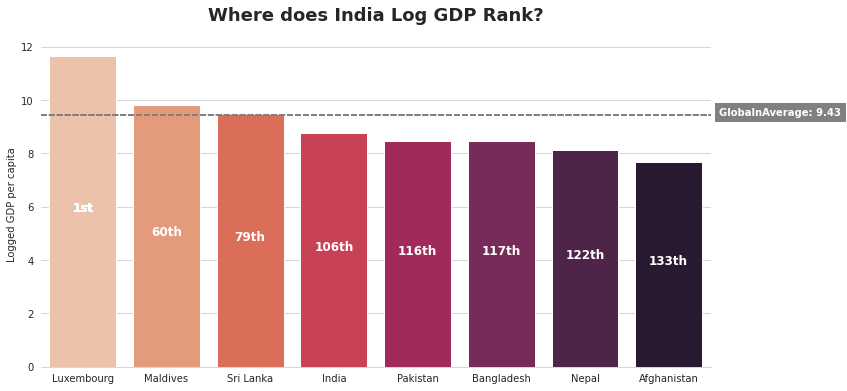

In [39]:
df_glob = happiness_report.sort_values('Logged GDP per capita', ascending=False)[['Country name', 'Logged GDP per capita', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Logged GDP per capita'] == df_glob['Logged GDP per capita'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)
mean_score = happiness_report['Logged GDP per capita'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Logged GDP per capita', data=top_bottom_neighbors, palette='rocket_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
  bar.text(x=i, y=(top_bottom_neighbors['Logged GDP per capita'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.text(x=0, y=(top_bottom_neighbors['Logged GDP per capita'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.axhline(mean_score, color='grey', linestyle='--')
  bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does India Log GDP Rank?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

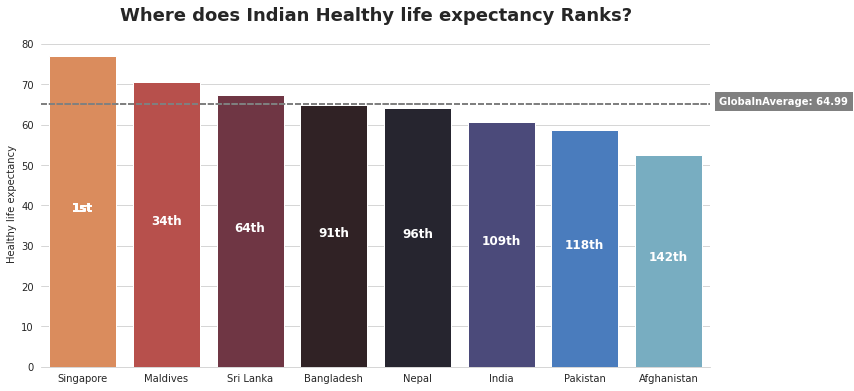

In [41]:
df_glob = happiness_report.sort_values('Healthy life expectancy', ascending=False)[['Country name', 'Healthy life expectancy', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Healthy life expectancy'] == df_glob['Healthy life expectancy'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)
mean_score = happiness_report['Healthy life expectancy'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Healthy life expectancy', data=top_bottom_neighbors, palette='icefire_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
  bar.text(x=i, y=(top_bottom_neighbors['Healthy life expectancy'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.text(x=0, y=(top_bottom_neighbors['Healthy life expectancy'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.axhline(mean_score, color='grey', linestyle='--')
  bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does Indian Healthy life expectancy Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

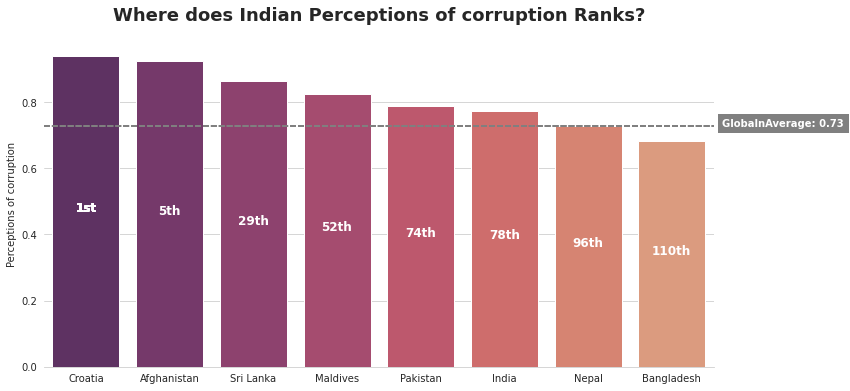

In [43]:
df_glob = happiness_report.sort_values('Perceptions of corruption', ascending=False)[['Country name', 'Perceptions of corruption', 'Regional indicator']].reset_index(drop=True)
top = df_glob[df_glob['Perceptions of corruption'] == df_glob['Perceptions of corruption'].max()]
neighbors = df_glob[df_glob['Regional indicator'] == 'South Asia']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('Regional indicator', axis=1, inplace=True)
mean_score = happiness_report['Perceptions of corruption'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Country name', y='Perceptions of corruption', data=top_bottom_neighbors, palette='flare_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
  bar.text(x=i, y=(top_bottom_neighbors['Perceptions of corruption'][i])/2, s=str(rank[i])+'th',
            fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.text(x=0, y=(top_bottom_neighbors['Perceptions of corruption'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
  bar.axhline(mean_score, color='grey', linestyle='--')
  bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
        fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title('Where does Indian Perceptions of corruption Ranks?', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

# *Conclusion*
- Among South Asian nations, India positions sixth in the happiness index. In a
world setting, India positions **139th**, far less than average.

- Among South Asian nations, India positions third in Log GDP per Capita scores. In a world setting, India positions **106th.**

- Among South Asian nations, India positions fifth in Healthy life expectancy scores. In a world setting, India positions **103th**.

- Among South Asian nations, India positions fifth in Perceptions of corruption scores. In a world setting, India positions **78th**.

- Among South Asian nations, India positions sixth in Social support scores. In a world setting, India positions **141th**.

- Among South Asian nations, India positions first in Freedom to make life choices scores. In a world setting, India positions **31st**.

- Among South Asian nations, India positions third in Generosity scores. In a
world setting, India positions **32nd**.